### ElasticNetCV를 활용한 문서별 지수 예측 및 분류

#### 빅데이터 경영MBA U2017038 김정규 / U2017057 전혜진

과제의 목적
- 문서 택스트 데이터를 이용, 각 카테고리별 점수를 예측하는 모델을 만든다.
- 예측된 점수를 이용, 문서를 카테고리별로 분류한다.

#####  필요 패키지 및 모듈 불러오기

In [1]:
import requests
import lxml.html
import datetime
import pandas as pd 
import numpy as np

##### 네이버 뉴스 크롤링_1
 - 20170101 ~ 20171231 기간에 대한 일자 리스트 정의

In [2]:
# datetime list 만들기

datetime_list = []

start = datetime.date(2017, 1, 1)
end = datetime.date(2017, 12, 31)
days = [start + datetime.timedelta(days = x) for x in range((end-start).days + 1)]
for day in days:
    datetime_list.append(day.strftime('%Y%m%d'))

In [3]:
# 일자 리스트 생성 확인
datetime_list[0:10]

['20170101',
 '20170102',
 '20170103',
 '20170104',
 '20170105',
 '20170106',
 '20170107',
 '20170108',
 '20170109',
 '20170110']

##### 네이버 뉴스 크롤링_2
 - 제목 및 내용 가져오기
 - 네이버 뉴스 랭킹뉴스 내 정치 첫 번째 기사만 크롤링 
 - 각 일자별 정치 랭킹뉴스 첫 번째 기사의 링크는 {div : ranking_section} > {li : num1} > {a : href}  노드
 - 상기 링크로 접속하여 {h3 : {id : articleTitle}} 노드에서 기사 제목 크롤링
 - 상시 링크로 접속하여 {div : {id : articleBodyContents}} 노드에서 기사  내용 크롤링
 - `<script>, <span>, <image>` 등의 태그들을 제거
 - 불필요 문자("\n", "    " 등) 및 이메일 주소 제거

In [4]:
url = "http://news.naver.com/main/ranking/popularDay.nhn?rankingType=popular_day&date=20170101"
res = requests.get(url)
element = lxml.html.fromstring(res.text)

In [5]:
postings = element.cssselect('div.ranking_section li.num1 a')

In [6]:
postings[0].attrib["href"]

'/main/ranking/read.nhn?mid=etc&sid1=111&rankingType=popular_day&oid=001&aid=0008928841&date=20170101&type=1&rankingSectionId=100&rankingSeq=1'

In [7]:
news_url = postings[0].attrib["href"]

In [8]:
"http://news.naver.com" + news_url

'http://news.naver.com/main/ranking/read.nhn?mid=etc&sid1=111&rankingType=popular_day&oid=001&aid=0008928841&date=20170101&type=1&rankingSectionId=100&rankingSeq=1'

In [9]:
res_2 = requests.get("http://news.naver.com" + news_url)

In [10]:
element_2 = lxml.html.fromstring(res_2.text)

In [11]:
## 뉴스 제목을 찾는 방법
element_2.cssselect("div.article_info h3")[0].text_content()

'朴대통령 "뇌물죄, 완전히 엮은 것…세월호 허위 걷혀야"(종합)'

In [12]:
title = element_2.cssselect("div.article_info h3")[0].text_content()

In [13]:
## 뉴스 기사 본문을 찾는 방법
element_2.get_element_by_id("articleBodyContents").text_content()

'\n\t\n\t\n\n\n\n// flash 오류를 우회하기 위한 함수 추가\nfunction _flash_removeCallback() {}\n\n\t\n\t새해 첫날 청와대서 사실상 기자간담회…직무정지 23일 만에 첫 입장표명"공모나 누구 봐준 일 손톱만큼도 없다…삼성 합병은 올바른 정책적 판단"\'7시간 의혹\'에 "입에 담기 민망한 이야기·너무 어이없다" 반박"블랙리스트 전혀 모르는 일…특검 연락오면 성실히 임하겠다"(서울=연합뉴스) 정윤섭 강건택 이한승 기자 = 박근혜 대통령은 1일 삼성물산과 제일모직 합병 과정을 놓고 뇌물죄 의혹이 불거진 것과 관련해 "완전히 나를 엮은 것"이라고 정면으로 반박했다.    박 대통령은 정유년 새해 첫날 청와대 상춘재에서 출입기자단과 신년 인사회를 한 자리에서 "누구를 봐줄 생각은 손톱만큼도 없었고 제 머릿속에서도 없었다"며 이같이 말했다.    박 대통령의 이러한 언급은 삼성 측이 삼성물산-제일모직 합병 찬성의 대가로 미르·K스프츠 재단에 돈을 기부하고, 최순실 씨의 딸 정유라씨에 대한 승마훈련 지원 등을 했다는 의혹을 정면으로 반박한 것이다.    특히 박영수 특별검사팀이 박 대통령을 겨냥해 뇌물죄 의혹을 입증하기 위해 집중적으로 수사하는 상황에서 "엮었다"는 입장을 공식 표명함에 따라 향후 탄핵심판 및 특검수사 과정에서 강도 높은 대응이 예상된다.    지난달 9일 국회의 탄핵소추안 가결로 직무가 정지된 이후 박 대통령이 참모진과 탄핵심판 대리인단 외에 외부인을 만난 것은 23일 만이다.     특히 박 대통령은 직무정지 이후 대외 활동을 중단한 채 최순실 게이트에 대한 직접적인 입장 표명을 자제했으나 이날 사실상의 기자 간담회를 통해 각종 의혹을 조목조목 반박했다.박 대통령은 삼성물산-제일모직 합병 문제에 대해 "공모나 누구를 봐주기 위해 한 일은 손톱만큼도 없다는 것을 분명히 말씀드릴 수 있다"며 "그것은 어떤 결정이든 간에 국가의 올바른 정책판단이다. 여기저기를 제가 도와주라고 한 적은 없다"고 강조했다.

In [14]:
news_article = element_2.get_element_by_id("articleBodyContents")

In [15]:
news_article

<Element div at 0x226393e86d8>

In [16]:
# Remove all javascript tags and style tags from html with python and the lxml module

from lxml.html.clean import Cleaner
cleaner = Cleaner()
cleaner.javascript = True 
cleaner.style = True  
cleaner.clean_html(element_2.get_element_by_id("articleBodyContents")).text_content()

'\n\t\n\t\n\n\n\n\t\n\t새해 첫날 청와대서 사실상 기자간담회…직무정지 23일 만에 첫 입장표명"공모나 누구 봐준 일 손톱만큼도 없다…삼성 합병은 올바른 정책적 판단"\'7시간 의혹\'에 "입에 담기 민망한 이야기·너무 어이없다" 반박"블랙리스트 전혀 모르는 일…특검 연락오면 성실히 임하겠다"(서울=연합뉴스) 정윤섭 강건택 이한승 기자 = 박근혜 대통령은 1일 삼성물산과 제일모직 합병 과정을 놓고 뇌물죄 의혹이 불거진 것과 관련해 "완전히 나를 엮은 것"이라고 정면으로 반박했다.    박 대통령은 정유년 새해 첫날 청와대 상춘재에서 출입기자단과 신년 인사회를 한 자리에서 "누구를 봐줄 생각은 손톱만큼도 없었고 제 머릿속에서도 없었다"며 이같이 말했다.    박 대통령의 이러한 언급은 삼성 측이 삼성물산-제일모직 합병 찬성의 대가로 미르·K스프츠 재단에 돈을 기부하고, 최순실 씨의 딸 정유라씨에 대한 승마훈련 지원 등을 했다는 의혹을 정면으로 반박한 것이다.    특히 박영수 특별검사팀이 박 대통령을 겨냥해 뇌물죄 의혹을 입증하기 위해 집중적으로 수사하는 상황에서 "엮었다"는 입장을 공식 표명함에 따라 향후 탄핵심판 및 특검수사 과정에서 강도 높은 대응이 예상된다.    지난달 9일 국회의 탄핵소추안 가결로 직무가 정지된 이후 박 대통령이 참모진과 탄핵심판 대리인단 외에 외부인을 만난 것은 23일 만이다.     특히 박 대통령은 직무정지 이후 대외 활동을 중단한 채 최순실 게이트에 대한 직접적인 입장 표명을 자제했으나 이날 사실상의 기자 간담회를 통해 각종 의혹을 조목조목 반박했다.박 대통령은 삼성물산-제일모직 합병 문제에 대해 "공모나 누구를 봐주기 위해 한 일은 손톱만큼도 없다는 것을 분명히 말씀드릴 수 있다"며 "그것은 어떤 결정이든 간에 국가의 올바른 정책판단이다. 여기저기를 제가 도와주라고 한 적은 없다"고 강조했다.    그러면서 박 대통령은 "특검의 연락이 오면 성실히 (조사에) 임하겠다"고 덧붙였다.    박 대통령은 최 씨와 연

In [17]:
## Crawling

news_title_list = []
news_content_list = []

for datetime in datetime_list:
    print(datetime)
    url = "http://news.naver.com/main/ranking/popularDay.nhn?rankingType=popular_day&date=" + datetime
    res = requests.get(url)
    element = lxml.html.fromstring(res.text)
    
    # 날짜별 정치 랭킹뉴스 1위 뉴스의 url 가져오기
    postings = element.cssselect('div.ranking_section li.num1 a')
    news_url = postings[0].attrib["href"]
    
    # 상기 url로 접속하여 뉴스 페이지의 element 저장하기
    res_2 = requests.get("http://news.naver.com" + news_url)
    element_2 = lxml.html.fromstring(res_2.text)
    
    # 뉴스 제목
    news_title = element_2.cssselect("div.article_info h3")[0].text_content()
    
    # 뉴스 내용
    news_content = cleaner.clean_html(element_2.get_element_by_id("articleBodyContents")).text_content()
    
    #### Data PrepProcessing #################
    # remove unnecessary characters #
    while news_content.find("\n") != -1 :
        news_content = news_content.replace("\n", " ")
        
    while news_content.find("    ") != -1 :
        news_content = news_content.replace("    ", " ")
               
    # remove string from email   
    if news_content.find("@") !=-1:
        index = news_content.find("@")
        while news_content[index] not in [" ", "."]:
            index = index -1
        news_content = news_content[:index]      

    news_content = news_content.strip()

    ########################################
    
    news_title_list.append(news_title)
    news_content_list.append(news_content) 

20170101
20170102
20170103
20170104
20170105
20170106
20170107
20170108
20170109
20170110
20170111
20170112
20170113
20170114
20170115
20170116
20170117
20170118
20170119
20170120
20170121
20170122
20170123
20170124
20170125
20170126
20170127
20170128
20170129
20170130
20170131
20170201
20170202
20170203
20170204
20170205
20170206
20170207
20170208
20170209
20170210
20170211
20170212
20170213
20170214
20170215
20170216
20170217
20170218
20170219
20170220
20170221
20170222
20170223
20170224
20170225
20170226
20170227
20170228
20170301
20170302
20170303
20170304
20170305
20170306
20170307
20170308
20170309
20170310
20170311
20170312
20170313
20170314
20170315
20170316
20170317
20170318
20170319
20170320
20170321
20170322
20170323
20170324
20170325
20170326
20170327
20170328
20170329
20170330
20170331
20170401
20170402
20170403
20170404
20170405
20170406
20170407
20170408
20170409
20170410
20170411
20170412
20170413
20170414
20170415
20170416
20170417
20170418
20170419
20170420
20170421
2


##### 데이터 프레임 생성

In [18]:
df = pd.DataFrame(columns=["Date", "Title", "Content"])
df["Date"] = datetime_list
df["Title"] = news_title_list
df["Content"] = news_content_list

In [19]:
df.head()

,Date,Title,Content
0,20170101,"朴대통령 ""뇌물죄, 완전히 엮은 것…세월호 허위 걷혀야""(종합)","새해 첫날 청와대서 사실상 기자간담회…직무정지 23일 만에 첫 입장표명""공모나 누구..."
1,20170102,"정유라, 덴마크서 불법 체류 혐의로 체포···특검 “송환 협조중” (종합)",[아시아경제 정준영 기자] 이화여대 학사부정 및 삼성 특혜지원 의혹의 수혜자 겸 공...
2,20170103,"[단독]정유라, “(주사 아줌마)누구인지 알 것 같다”…현지 답변태도 분석, 사전 ...",덴마크 올보르 법원에서 잠시 휴정중 기자들의 질문에 답변하는 정유라씨 사진=현지교...
3,20170104,"[단독]""정유라, 이대학장실 등 교내서 교수 6명에 학점취득 코치받아""","[연합뉴스TV제공]김병욱, 교육부 자료 확인…""학점 좋은이유 모른다더니""담당교수들 ..."
4,20170105,"윤전추 ""기억안나. 몰라. 말못해""… 헌재 ""본인범죄 외 답해라""","""외부인 동행 없다"" 주장하다 ""세월호 당일 미용사 태워왔다"" 윤전추 헌재 탄핵심리..."


##### "일자_기사제목" 형식으로 파일 이름 설정 후 "./news" 폴더에 저장

In [20]:
import re

for i in range(0, len(df["Content"])):
    title = df["Title"][i]
    # 윈도우 os에서 파일 저장시 특수기호 제한, 정규표현식으로 제목 내 특수기호 제외
    parsed_title = re.sub('[-=."#/?:$]', '', title)
    fname = df["Date"][i] + "_" + parsed_title + ".txt"
    with open("./news/" + fname, "w", encoding = "UTF8") as f:
        f.write(df["Title"][i] + "\n\n" + df["Content"][i])

##### 라벨링 완료한 데이터 가져오기
- 데이터 라벨링은 조원 2명이 각각 나누어서 시행
- 조원이 뉴스를 직접 읽고 전체 뉴스를 청와대(BH), 국회/정당(Con/Party), 북한(North), 행정(Admin), 국방/외교(Defence/Diplo), 정치일반(Politic) 등 6개 카테고리별 뉴스를 읽고 관련성이 있다고 생각한 점수를 1점에서 10점 사이로 scoring 
- `Category` 컬럼은 부여된 6개의 점수 중 가장 높은 점수를 받은 카테고리를 표시한 것으로 해당 뉴스가 이 카테고리에 분류된 것으로 간주

In [21]:
# After labeling ty
labeled_data = pd.read_csv("labeled_dataset.csv", encoding = "UTF8", index_col = 0)

In [22]:
labeled_data.head()

,Date,Title,BH,Con/Party,North,Admin,Defence/Diplo,Politic,Category
0,20170101,"朴대통령 ""뇌물죄, 완전히 엮은 것…세월호 허위 걷혀야""(종합)",8,0,0,0,0,2,BH
1,20170102,"정유라, 덴마크서 불법 체류 혐의로 체포···특검 “송환 협조중” (종합)",6,0,0,0,0,3,BH
2,20170103,"[단독]정유라, “(주사 아줌마)누구인지 알 것 같다”…현지 답변태도 분석, 사전 ...",6,0,0,0,0,3,BH
3,20170104,"[단독]""정유라, 이대학장실 등 교내서 교수 6명에 학점취득 코치받아""",5,0,0,0,0,6,Politic
4,20170105,"윤전추 ""기억안나. 몰라. 말못해""… 헌재 ""본인범죄 외 답해라""",7,0,0,0,0,2,BH


##### 형태소 분석기 Komoran 사용, tokenize 함수 정의(명사(Noun) 만 사용)

In [23]:
from konlpy.tag import Komoran
tag = Komoran()

In [24]:
def kor_noun(text):
    words = []
    for w in tag.nouns(text):
        if len(w) > 1:
            words.append(w)
    return words

##### TfidfVectorizer 사용 단어들을 vector화 하고 TermDocumentMatrix(df_tfidf) 생성

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
text_data_list = df["Content"].astype(str).tolist()
text_data_arr = np.array(["".join(text) for text in text_data_list])

In [27]:
vectorizer = TfidfVectorizer(min_df = 2, tokenizer = kor_noun, norm = 'l2')
text_data = vectorizer.fit_transform(text_data_arr)

C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [28]:
df_tfidf = pd.DataFrame(text_data.A, columns = vectorizer.get_feature_names())
df_tfidf.head()

,12월 14일,1시간,1월 2일,2007년 남북정상회담,2010년 9월,2012년 10월,2012년 12월,2013년 10월,2013년 12월,2013년 1월,...,휴전선,휴정,휴학,흐름,흔적,흡수,희망,희생,희생자,흰색
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.072151,0.037957,0.0,0.036075,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


##### BH(청와대 ) 점수에 대한 ElasticNetCV 모델 생성

In [29]:
##### 청와대 지수를 TermDocumentMatrix에 붙어 데이터셋으르 생성

df_bh_1 = pd.DataFrame({"BH_y" : list(labeled_data["BH"])})
df_bh = pd.concat([df_tfidf, df_bh_1['BH_y']], axis=1)

In [30]:
X = df_bh.drop(["BH_y"], axis=1)
y =  df_bh["BH_y"]

In [31]:
## Data Spliting

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state = 1234)

In [32]:
X_test.shape

(73, 4412)

In [33]:
## Modeling Training

from sklearn.linear_model import ElasticNetCV

In [34]:
elastic_bh = ElasticNetCV(cv=3, random_state=0)

In [35]:
elastic_bh.fit(X_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=3, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto', random_state=0,
       selection='cyclic', tol=0.0001, verbose=0)

In [36]:
y_pred = elastic_bh.predict(X_test)

In [37]:
## Model evaluation

from sklearn.metrics import r2_score, mean_squared_error

In [38]:
r2_score(y_test, y_pred)

0.5381201908514406

In [39]:
mean_squared_error(y_test, y_pred)

7.564462792878527

In [40]:
elastic_bh.score(X_test, y_test) ## 결정계수값 = 0.55

0.5381201908514406

- 청와대 지수 계산 모델을 ElasticNetCV로 생성한 결과,
- 결정계수는 0.54이고 MSE 값은 7.56 이었음

##### 청와대 지수 예측 모델(elastic_bh)의 예측값과 labeled 데이터값간의 차이를 시각화

In [41]:
df_compare = pd.DataFrame({"y_pred" : y_pred.tolist(), "y_labeled" : y_test.tolist()})

In [42]:
df_compare["x_axis"] = df_compare.index.tolist()
df_compare[["x_axis", "y_labeled", "y_pred"]].head()

,x_axis,y_labeled,y_pred
0,0,9,6.621854
1,1,9,4.825073
2,2,0,3.668346
3,3,10,9.100115
4,4,6,4.988630


In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

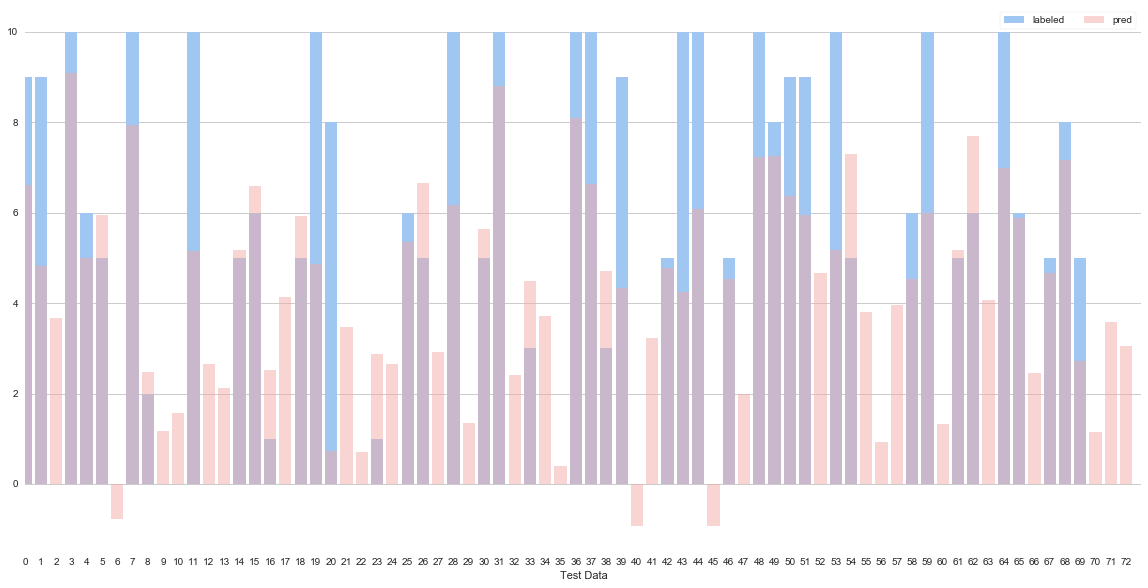

In [44]:
sns.set(style = "whitegrid")
f, ax = plt.subplots(figsize = (20, 10))

sns.set_color_codes("pastel")
sns.barplot(x = "x_axis", y = "y_labeled", data = df_compare, label = "labeled", color = "b")
sns.barplot(x = "x_axis", y = "y_pred", data = df_compare, label = "pred", color = "r", alpha = 0.5)

ax.legend(ncol = 2, loc = "upper right", frameon = True)
ax.set(xlim = (0, 73), ylabel = "", xlabel = "Test Data")
sns.despine(left = True, bottom = True)

##### Con/Party(국회/정당 ) 점수에 대한 ElasticNetCV 모델 생성

In [45]:
#####  국회/정당 지수를 TermDocumentMatrix에 붙어 데이터셋으르 생성

df_con_party_1 = pd.DataFrame({"Con/Party_y" : list(labeled_data["Con/Party"])})
df_con_party = pd.concat([df_tfidf, df_con_party_1['Con/Party_y']], axis=1)

In [46]:
X = df_con_party.drop(["Con/Party_y"], axis=1)
y =  df_con_party["Con/Party_y"]

In [47]:
## Data Spliting
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state = 1234)

In [48]:
## Modeling Training

from sklearn.linear_model import ElasticNetCV

In [49]:
elastic_con_party = ElasticNetCV(cv=3, random_state=0)

In [50]:
elastic_con_party.fit(X_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=3, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto', random_state=0,
       selection='cyclic', tol=0.0001, verbose=0)

In [51]:
y_pred = elastic_con_party.predict(X_test)

In [52]:
## Model evaluation

from sklearn.metrics import r2_score, mean_squared_error

In [53]:
r2_score(y_test, y_pred)

0.5447377768713692

In [54]:
mean_squared_error(y_test, y_pred)

7.707762862659286

- 국회/정당 지수 계산 모델을 ElasticNetCV로 생성한 결과,
- 결정계수는 0.54이고 MSE 값은 7.70 이었음

##### 국회/정당 지수 예측 모델(elastic_con_party) 예측값과 labeled 데이터값간의 차이를 시각화

In [55]:
df_compare = pd.DataFrame({"y_pred" : y_pred.tolist(), "y_labeled" : y_test.tolist()})

In [56]:
df_compare["x_axis"] = df_compare.index.tolist()
df_compare[["x_axis", "y_labeled", "y_pred"]].head()

,x_axis,y_labeled,y_pred
0,0,10,7.365913
1,1,0,2.593460
2,2,0,1.857930
3,3,9,8.159385
4,4,2,0.130726


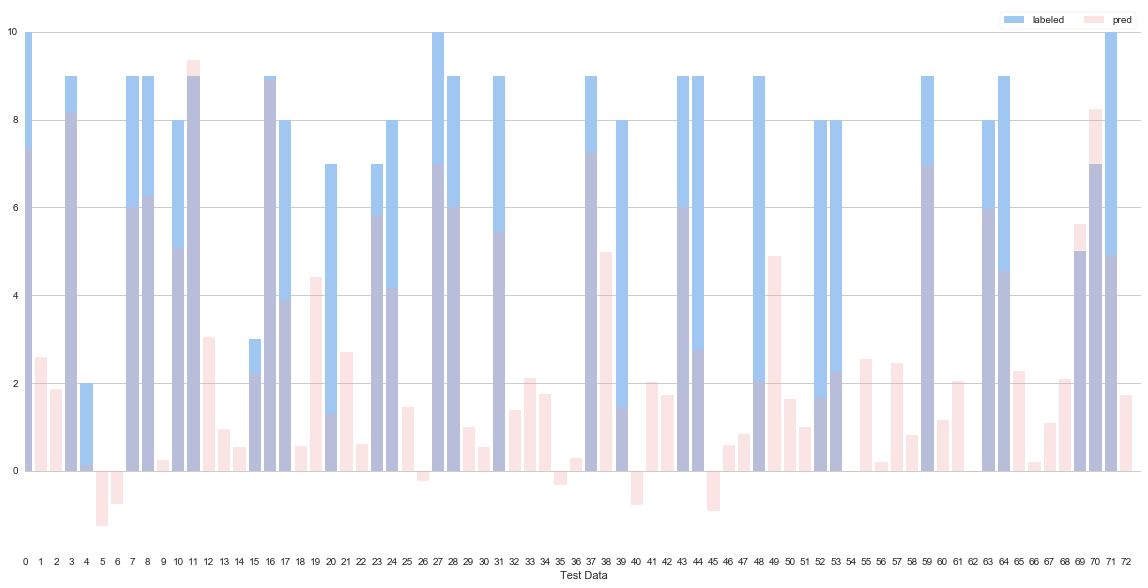

In [57]:
sns.set(style = "whitegrid")
f, ax = plt.subplots(figsize = (20, 10))

sns.set_color_codes("pastel")
sns.barplot(x = "x_axis", y = "y_labeled", data = df_compare, label = "labeled", color = "b")
sns.barplot(x = "x_axis", y = "y_pred", data = df_compare, label = "pred", color = "r", alpha = 0.3)

ax.legend(ncol = 2, loc = "upper right", frameon = True)
ax.set(xlim = (0, 73), ylabel = "", xlabel = "Test Data")
sns.despine(left = True, bottom = True)

##### North(북한 )지수 산출 모델 생성

In [58]:
# 북한 지수를 TermDocumentMatrix에 붙어 데이터셋으르 생성

df_north_1 = pd.DataFrame({"North_y" : list(labeled_data["North"])})
df_north = pd.concat([df_tfidf, df_north_1['North_y']], axis=1)

In [59]:
X = df_north.drop(["North_y"], axis=1)
y =  df_north["North_y"]

In [60]:
## Data Spliting
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state = 1234)

In [61]:
## Modeling Training

from sklearn.linear_model import ElasticNetCV

In [62]:
elastic_north = ElasticNetCV(cv=3, random_state=0)

In [63]:
elastic_north.fit(X_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=3, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto', random_state=0,
       selection='cyclic', tol=0.0001, verbose=0)

In [64]:
y_pred = elastic_north.predict(X_test)

In [65]:
## Model evaluation

from sklearn.metrics import r2_score, mean_squared_error

In [66]:
r2_score(y_test, y_pred)

0.5028839194272506

In [67]:
mean_squared_error(y_test, y_pred)

4.942242437369912

- 북한 지수 계산 모델을 ElasticNetCV로 생성한 결과,
- 결정계수는 0.5이고 MSE 값은 4.94 이었음

##### 북한 지수 예측모델(elastic_north) 예측값과 labeled 데이터값간의 차이를 시각화

In [68]:
df_compare = pd.DataFrame({"y_pred" : y_pred.tolist(), "y_labeled" : y_test.tolist()})

In [69]:
df_compare["x_axis"] = df_compare.index.tolist()
df_compare =  df_compare[["x_axis", "y_labeled", "y_pred"]]

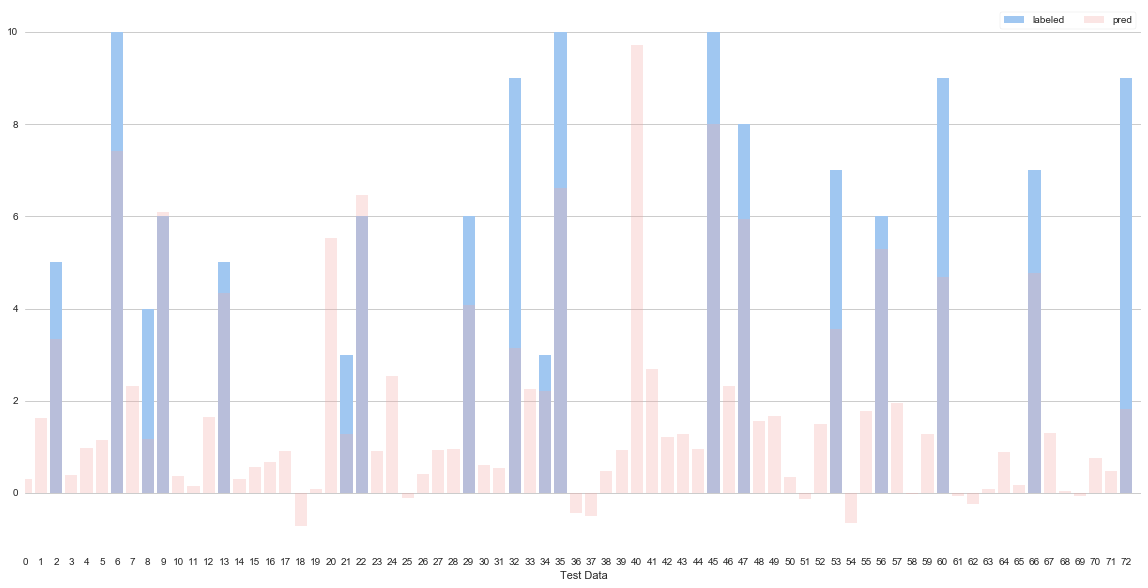

In [70]:
sns.set(style = "whitegrid")
f, ax = plt.subplots(figsize = (20, 10))

sns.set_color_codes("pastel")
sns.barplot(x = "x_axis", y = "y_labeled", data = df_compare, label = "labeled", color = "b")
sns.barplot(x = "x_axis", y = "y_pred", data = df_compare, label = "pred", color = "r", alpha = 0.3)

ax.legend(ncol = 2, loc = "upper right", frameon = True)
ax.set(xlim = (0, 73), ylabel = "", xlabel = "Test Data")
sns.despine(left = True, bottom = True)

##### Admin(행정) 지수 산출 모델 생성

In [71]:
# 행정 지수를 TermDocumentMatrix에 붙어 데이터셋으르 생성

df_admin_1 = pd.DataFrame({"Admin_y" : list(labeled_data["Admin"])})
df_admin = pd.concat([df_tfidf, df_admin_1['Admin_y']], axis=1)

In [72]:
X = df_admin.drop(["Admin_y"], axis=1)
y =  df_admin["Admin_y"]

In [73]:
## Data Spliting
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state = 1234)

In [74]:
## Modeling Training

from sklearn.linear_model import ElasticNetCV

In [75]:
elastic_admin = ElasticNetCV(cv=3, random_state=0)

In [76]:
elastic_admin.fit(X_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=3, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto', random_state=0,
       selection='cyclic', tol=0.0001, verbose=0)

In [77]:
y_pred = elastic_admin.predict(X_test)

In [78]:
## Model evaluation

from sklearn.metrics import r2_score, mean_squared_error

In [79]:
r2_score(y_test, y_pred)

0.026252949379969248

In [80]:
mean_squared_error(y_test, y_pred)

11.941877415316474

- 행정지수 예측 모델의 결정계수는 0.026이고,  MSE 값은 11.94 임
- 결정계수 값이 0.03으로 모델이 데이터를 거의 설명하지 못하고 있음
- 행정이라는 주제가 다른 주제들과 비교시 그 의미가 추상적이고 광범위하여 모델이 값을 예측하기 곤란했을 거라 사료됨

##### 행정지수 예측모델(elastic_admin)의 예측값과 labeled 데이터값간의 차이를 시각화

In [81]:
df_compare = pd.DataFrame({"y_pred" : y_pred.tolist(), "y_labeled" : y_test.tolist()})

In [82]:
df_compare["x_axis"] = df_compare.index.tolist()
df_compare =  df_compare[["x_axis", "y_labeled", "y_pred"]]

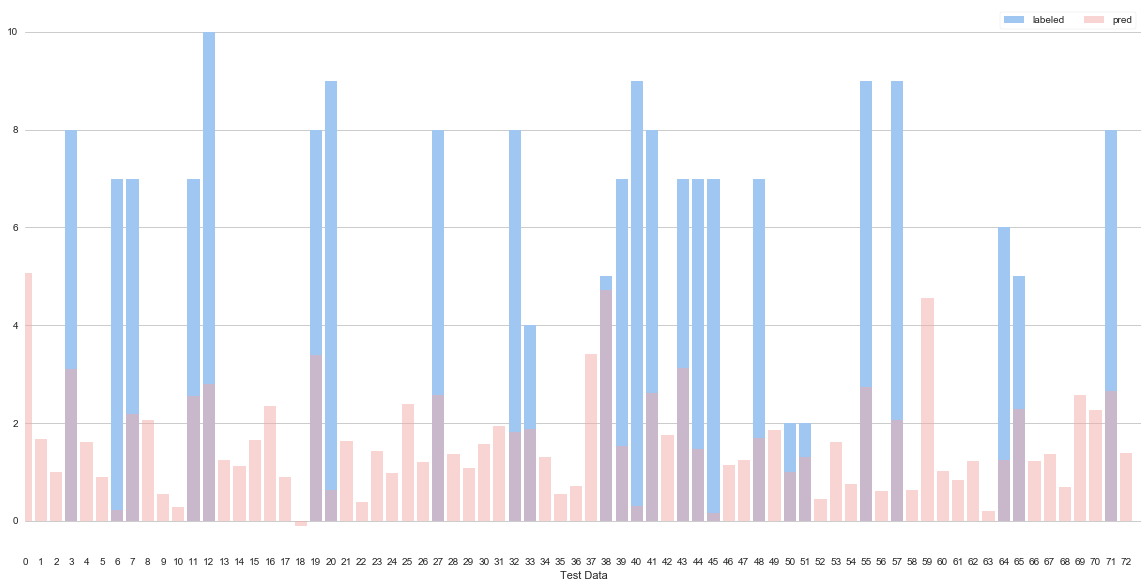

In [83]:
sns.set(style = "whitegrid")
f, ax = plt.subplots(figsize = (20, 10))

sns.set_color_codes("pastel")
sns.barplot(x = "x_axis", y = "y_labeled", data = df_compare, label = "labeled", color = "b")
sns.barplot(x = "x_axis", y = "y_pred", data = df_compare, label = "pred", color = "r", alpha = 0.5)

ax.legend(ncol = 2, loc = "upper right", frameon = True)
ax.set(xlim = (0, 73), ylabel = "", xlabel = "Test Data")
sns.despine(left = True, bottom = True)

##### 국방/외교 지수 산출 모델 생성

In [84]:
# 국방/외교 지수를 TermDocumentMatrix에 붙어 데이터셋으르 생성

df_defence_diplo_1 = pd.DataFrame({"Defence/Diplo_y" : list(labeled_data["Defence/Diplo"])})
df_defence_diplo = pd.concat([df_tfidf, df_defence_diplo_1['Defence/Diplo_y']], axis=1)

In [85]:
X = df_defence_diplo.drop(["Defence/Diplo_y"], axis=1)
y = df_defence_diplo["Defence/Diplo_y"]

In [86]:
## Data Spliting
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state = 1234)

In [87]:
## Modeling Training

from sklearn.linear_model import ElasticNetCV

In [88]:
elastic_defence_diplo = ElasticNetCV(cv=3, random_state=0)

In [89]:
elastic_defence_diplo.fit(X_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=3, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto', random_state=0,
       selection='cyclic', tol=0.0001, verbose=0)

In [90]:
y_pred = elastic_defence_diplo.predict(X_test)

In [91]:
## Model evaluation

from sklearn.metrics import r2_score, mean_squared_error

In [92]:
r2_score(y_test, y_pred)

0.6311010424815219

In [93]:
mean_squared_error(y_test, y_pred)

6.01868098376554

- 국방/외교 지수 계산 모델(elastic_defence_diplo)을 ElasticNetCV로 생성한 결과,
- 결정계수는 0.63이고 MSE 값은 6.02 이었음
- 가장 성능이 우수한 모델이 이었는데, 이는 국방/외교에 대한 기사들이 다른 기사들보다 쉽게 구분되는 주제이었기 때문이었을거라고 사료됨.

##### 국빙/외교 지수 예측 모델(elastic_defence_diplo) 예측값과 labeled 데이터값간의 차이를 시각화

In [94]:
df_compare = pd.DataFrame({"y_pred" : y_pred.tolist(), "y_labeled" : y_test.tolist()})

In [95]:
df_compare["x_axis"] = df_compare.index.tolist()
df_compare =  df_compare[["x_axis", "y_labeled", "y_pred"]]

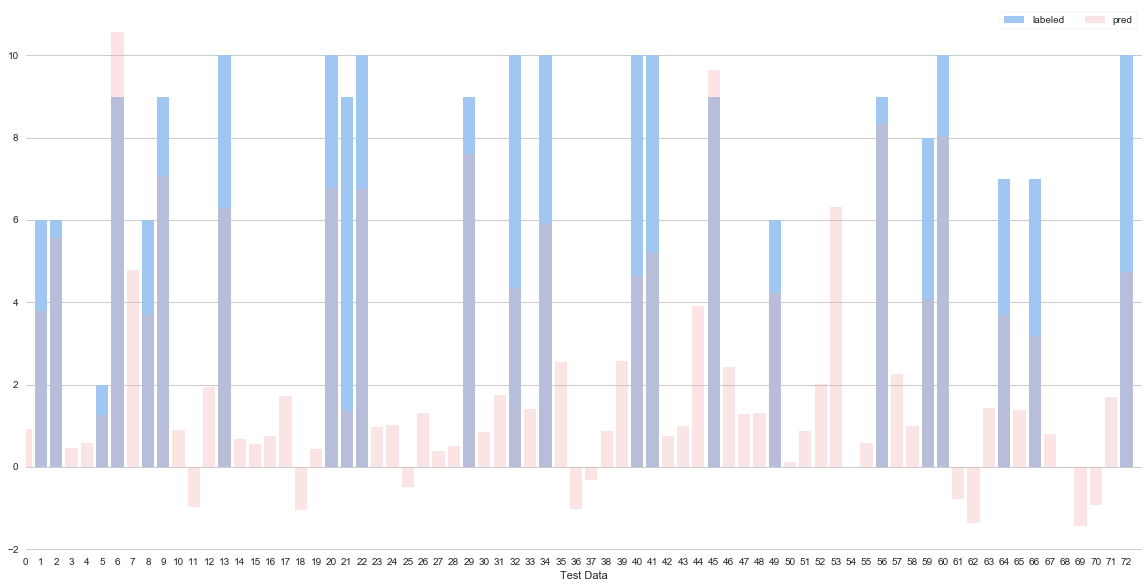

In [96]:
sns.set(style = "whitegrid")
f, ax = plt.subplots(figsize = (20, 10))

sns.set_color_codes("pastel")
sns.barplot(x = "x_axis", y = "y_labeled", data = df_compare, label = "labeled", color = "b")
sns.barplot(x = "x_axis", y = "y_pred", data = df_compare, label = "pred", color = "r", alpha = 0.3)

ax.legend(ncol = 2, loc = "upper right", frameon = True)
ax.set(xlim = (0, 73), ylabel = "", xlabel = "Test Data")
sns.despine(left = True, bottom = True)

##### Politic(정치일반)지수 산출 모델 생성

In [97]:
# 정치일반 지수를 TermDocumentMatrix에 붙어 데이터셋으르 생성

df_politic_1 = pd.DataFrame({"Politic_y" : list(labeled_data["Politic"])})
df_politic = pd.concat([df_tfidf, df_politic_1['Politic_y']], axis=1)

In [98]:
X = df_politic.drop(["Politic_y"], axis=1)
y = df_politic["Politic_y"]

In [99]:
## Data Spliting
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state = 1234)

In [100]:
## Modeling Training

from sklearn.linear_model import ElasticNetCV

In [101]:
elastic_politic = ElasticNetCV(cv=3, random_state=0)

In [102]:
elastic_politic.fit(X_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=3, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto', random_state=0,
       selection='cyclic', tol=0.0001, verbose=0)

In [103]:
y_pred = elastic_politic.predict(X_test)

In [104]:
## Model evaluation

from sklearn.metrics import r2_score, mean_squared_error

In [105]:
r2_score(y_test, y_pred)

0.17361207263422473

In [106]:
mean_squared_error(y_test, y_pred)

9.75072623323423

- 정치 일반 지수 예측 모델(elastic_politic)의 결정계수는 0.17이고,  MSE 값은 9.75 임
- 결정계수 값이 0.17으로 모델이 데이터를 거의 설명하지 못하고 있음
- 정치일반이라는 주제가 행정과 같이 다른 주제들과 비교시 그 의미가 추상적이고 광범위하여 모델이 값을 예측하기 곤란했을 거라 사료됨

##### 정치일반지수 예측모델(elastic_politic) 예측값과 labeled 데이터값간의 차이를 시각화

In [107]:
df_compare = pd.DataFrame({"y_pred" : y_pred.tolist(), "y_labeled" : y_test.tolist()})

In [108]:
df_compare["x_axis"] = df_compare.index.tolist()
df_compare =  df_compare[["x_axis", "y_labeled", "y_pred"]]

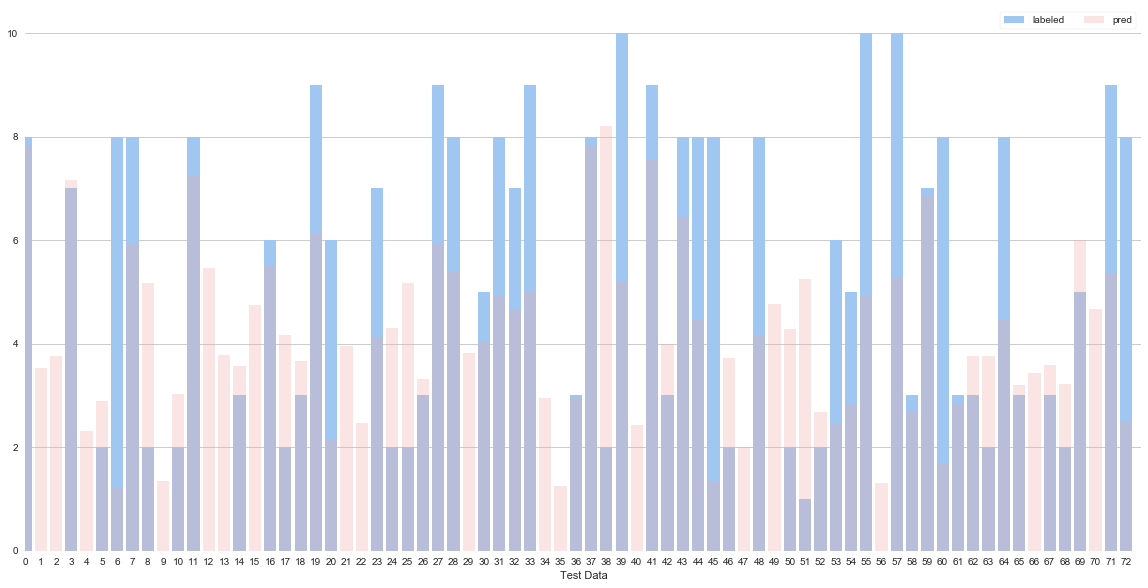

In [109]:
sns.set(style = "whitegrid")
f, ax = plt.subplots(figsize = (20, 10))

sns.set_color_codes("pastel")
sns.barplot(x = "x_axis", y = "y_labeled", data = df_compare, label = "labeled", color = "b")
sns.barplot(x = "x_axis", y = "y_pred", data = df_compare, label = "pred", color = "r", alpha = 0.3)

ax.legend(ncol = 2, loc = "upper right", frameon = True)
ax.set(xlim = (0, 73), ylabel = "", xlabel = "Test Data")
sns.despine(left = True, bottom = True)

##### 임의의 파일 가져오기와 각 모델에 대입, 각 지수 산출해보기

In [110]:
# "20170101_朴대통령 뇌물죄, 완전히 엮은 것…세월호 허위 걷혀야(종합).txt" 파일은 2017.01.01 2위 뉴스를 가져온 파일임.
with open("./test_news/20170101_7시간해명 집중한 대통령...돌연 기자 간담회, 왜.txt", "rb") as data:
    data = data.read()
    data = data.decode("utf-8")

In [111]:
data

'\ufeff[앵커]\r\n\r\n그럼 오늘(1일) 박근혜 대통령의 기자 간담회에 참여해서 주장을 직접 듣고 온 정치부 윤설영 기자와 자세한 얘기 나눠보겠습니다.\r\n\r\n윤 기자, 오늘 박 대통령이 모습을 보인 것이 3차 대국민 담화 이후 처음이었죠. (네, 그렇습니다.) 한 달 여 만에 모습을 드러낸 것이어서 많은 분들이 관심을 갖고 지켜봤습니다. 오늘 박 대통령이 한 얘기 가운데 세월호 7시간 의혹, 이 부분이 가장 비중이 컸던 것 같습니다.\r\n\r\n[기자]\r\n\r\n네, 박 대통령은 세월호 7시간 부분에 대해 제기되고 있는 의혹에 대해서 한마디로 전면 부인을 했습니다. 새로운 팩트를 앞세우기보다는 강한 표현으로 대체했습니다.\r\n\r\n왜곡과 오보 또 허위가 남발이 된다고 주장했습니다. 실은 어떤 게 왜곡이고 어떤게 허위라는건지에 대해서는 구체적인 팩트라든가 이를 뒷받침할만한 근거를 제시하지는 않았습니다. \r\n\r\n세월호 참사 7시간 문제는 한두 언론이 아니라 사실상 모든 언론이 제기했던 다양한 의혹들이 있는데 이를 한마디로 허위 남발이라고 말한 겁니다 \r\n\r\n[앵커]\r\n\r\n"대통령으로서 할 일은 했다"고 하면서도 관저 출근을 하지 않은 점은 인정을 한 것이거든요?\r\n\r\n[기자]\r\n\r\n네, 세월호 당일 왜 관저에만 있었냐는 기자의 질문에, 박 대통령은 현장은 바쁠 것 같아 본관에 가지 않았다고 밝혔는데요. \r\n\r\n관저에서 30~40분에 한 번씩 전화로 보고도 받고 지시도 했다, 그리고 다른 업무도 같이 봤다고 말했는데요.\r\n\r\n대형 국가적 참사에 대응해야할 최종 책임자가 바로 대통령인데 본관에 출근해서 회의를 주재하고 직접 지휘를 하면 업무에 차질이 빚어질 것 같아서 안 했다는 해명인데, 아무리 봐도 이해가 어려운 부분입니다. \r\n\r\n[앵커]\r\n\r\n관저에서는 어떤 조치를 했다고 했습니까?\r\n\r\n[기자]\r\n\r\n구체적으로 어떤 보고를 받고 어떻게 지휘했는지도 오늘 해

In [112]:
df_test_doc = pd.DataFrame({"Content" : [data]})

In [113]:
test_doc_data_list = df_test_doc["Content"].astype(str).tolist()
test_doc_data_arr = np.array(["".join(text) for text in test_doc_data_list])

In [114]:
vectorizer = TfidfVectorizer(max_df = 2, tokenizer=kor_noun, norm = 'l2')
test_doc_data = vectorizer.fit_transform(test_doc_data_arr)

C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [115]:
test_doc_df_tfidf = pd.DataFrame(test_doc_data.A, columns = vectorizer.get_feature_names())
test_doc_df_tfidf.shape

(1, 157)

#####  임의로 선택된 데이터(data)에서 형성된 Tfidf를  지수 각 6개 산출 모델(regr_bh)에 대입 후 점수 산출  하기 

In [116]:
X_test_doc = test_doc_df_tfidf

##### 모델을 생성시 사용한 TermDocumentMatrix의 단어는 4412개 이어서 새로 대입되는 data의 TDM(단어컬럼수가 157개)을 기존 훈련 데이터 형식과 맞추는 작업이 필요
 - 대입되는 data의 tfidf 데이터 프레임을 transpose하고 index를 새로운 "words"컬럼에 삽입하고 동 tfdif 내 값들을 "weight" 컬럼으로 정의하여 새로운 데이터 프레임 df_2를 정의
 - 모델 생성시 사용했던 df_tfidf의 컬럼 이름들을 새로운 "words" 컬럼에 삽입하여 새로운 데이터 프레임 df_3를 정의
 - df_3를 기준으로 키값 "words"에 대해 "left outer" 조인 시행 후 데이터 프레임 "merged_df_4"를 정의
 - "merged_df_4" DF의 index를 "words" 컬럼으로 대체하고 "words" 컬럼으로 삭제 후 새로운 데이터 프레임 "df_4"를 정의
 - "df_4"를 다시 tranpose하고 NaN값들을 0으로 대체하여 최종 모델에 대입할 "X_test_doc" 데이터를 생성

In [117]:
# 대입되는 data의 tfidf를 transpose하고 index를 새로운 "words"컬럼에 삽입, 동 tfdif 내 값들을 "weight" 컬럼으로 하여 최종 새로운 데이터 프레임 df_2를 정의
df_2 = test_doc_df_tfidf.transpose()
df_2["words"] = df_2.index
df_2 = df_2.rename(columns = {0 : "weights"})
df_2_list = df_2["words"].tolist()

In [118]:
# 모델 생성시 사용했던 df_tfidf의 컬럼 이름들을 새로운 "words" 컬럼에 삽입하여 새로운 데이터 프레임 df_3를 정의
df_large_words = pd.DataFrame(df_tfidf.columns.values, columns = ["words"])
df_3 = df_large_words
df_3_list = df_3["words"].tolist()

In [119]:
## large words set 과 small words set의 교집합 범위는 143개, 즉 data의 단어 컬럼수가 157개에서 143개로 감소하였음에 유의
len(set(df_2_list) & set(df_3_list))

147

In [120]:
set(df_2_list) - (set(df_2_list) & set(df_3_list)) # 대입될 데이터에는 있지만 훈련용 데이터 셋에는 없는 단어 집합 확인(tfidf)

{'건지', '남발', '노트북', '미팅', '사심', '새해 첫날', '순수한 마음', '정치부', '통치행위', '한광옥'}

In [121]:
# "merged_df_4" DF의 index를 "words" 컬럼으로 대체하고 "words" 컬럼으로 삭제 후 새로운 데이터 프레임 "df_4"를 정의
merged_df_4 = pd.merge(df_3, df_2[["weights", "words"]], how = "left", on = ["words"])

In [122]:
# "df_4"를 다시 tranpose하고 NaN값들을 0으로 대체하여 최종 모델에 대입할 "X_test_doc" 데이터를 생성
merged_df_4.index =merged_df_4["words"].tolist()
df_4 = merged_df_4.drop(["words"], axis = 1)
X_test_doc = df_4.transpose().fillna(0)

In [123]:
# 훈련용 데이터셋에서 사용된 단어컬럼들의 형식으로 재정의
X_test_doc

,12월 14일,1시간,1월 2일,2007년 남북정상회담,2010년 9월,2012년 10월,2012년 12월,2013년 10월,2013년 12월,2013년 1월,...,휴전선,휴정,휴학,흐름,흔적,흡수,희망,희생,희생자,흰색
weights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### 각  지출 모델에 대입하여 점수 확인

In [124]:
elastic_bh.predict(X_test_doc)[0]

8.595485090973739

In [125]:
elastic_con_party.predict(X_test_doc)[0]

3.4408796129761843

In [126]:
elastic_north.predict(X_test_doc)[0]

-1.5028328371933684

In [127]:
elastic_admin.predict(X_test_doc)[0]

0.4143353233798872

##### 국방/외교 지수 산출 모델에 대입하여 국방/외교 지수 산출

In [128]:
elastic_defence_diplo.predict(X_test_doc)[0]

0.1516826872381194

##### 정치일반 지수 산출 모델에 대입하여 정치일반 지수 산출

In [129]:
elastic_politic.predict(X_test_doc)[0]

3.1516784101620874

- 가장 높은 점수는 8.59인 청와대 지수 점수 이므로 data는 청와대와 관련이 있는 뉴스로 판단 가능

##### 6개 지수 자동 산출 함수 생성

In [130]:
def auto_6_scores_of_text(fname):
    
    ## ".txt 파일 읽어오기" #################################################################
    with open(fname, "rb") as data:
        data = data.read()
        data = data.decode("utf-8")

    ## 읽은 파일 내용에 대한 tfidf DataFrame 만들기 ##########################################
    df_test_doc = pd.DataFrame({"Content"  : [data]})
    test_doc_data_list = df_test_doc["Content"].astype(str).tolist()
    test_doc_data_arr = np.array(["".join(text) for text in test_doc_data_list])
    vectorizer = TfidfVectorizer(max_df = 2, tokenizer = kor_noun, norm = 'l2')
    test_doc_data = vectorizer.fit_transform(test_doc_data_arr)
    test_doc_df_tfidf = pd.DataFrame(test_doc_data.A, columns = vectorizer.get_feature_names())
    
    ## X_test_doc 데이터 포맷을 모델의 입력 데이터 포맷과 일치하는 작업 ###########################
    
    ## 읽은 데이터에 대한 부분 단어 데이터 프레임 만들기
    df_partial_words = test_doc_df_tfidf.transpose()
    df_partial_words["words"] = df_partial_words.index
    df_partial_words = df_partial_words.rename(columns = {0 : "weights"})
    
    ## 전체 단어 데이터 프레임(left)과 부분 단어 데이터 프레임(right)를 서로 "left outer join"
    df_total_words = pd.DataFrame(df_tfidf.columns.values, columns = ["words"])
    merged_total_partial_df_by_words = pd.merge(df_total_words,
                                                df_partial_words[["weights", "words"]],
                                                how = "left",
                                                on = ["words"])
    
    ## "left outer" 조인 후 인덱스를 전체 단어로 대체
    merged_total_partial_df_by_words.index = merged_total_partial_df_by_words["words"].tolist()
    
    ## "words" 컬럼 삭제
    total_partial_df_by_words = merged_total_partial_df_by_words.drop(["words"], axis = 1)
    
    ## "transpose()"하고 "NaN" 갑을 0으로 대체, 최종 모델 입력 데이터 생성
    X_test_doc = total_partial_df_by_words.transpose().fillna(0)
    
    ## 각 모델별 지수 산출 #################################################################
    
    ## 청와대(bh) 지수
    BH_score = elastic_bh.predict(X_test_doc)[0]
    print("청와대 지수 : ", BH_score)
    
    ## 국회/정당(con_party) 지수
    Con_Party_score = elastic_con_party.predict(X_test_doc)[0]
    print("국회/정당 지수 : ", Con_Party_score)
    
    ## 북한(north) 지수
    North_score = elastic_north.predict(X_test_doc)[0]
    print("북한 지수 : ", North_score)
    
    ## 행정(admin) 지수
    Admin_score = elastic_admin.predict(X_test_doc)[0]
    print("행정 지수 : ", Admin_score)
    
    ## 국방/외교(defence_diplo) 지수
    Defence_diplo_score = elastic_defence_diplo.predict(X_test_doc)[0]
    print("국방/외교 지수 : ", Defence_diplo_score)
    
    ## 정치(politic) 지수
    Politic_score = elastic_politic.predict(X_test_doc)[0]
    print("정치일반 지수 : ", Politic_score, "\n")
    
    ## 각 지수 데이터 프레임 생성
    global df_scores
    global df_score_transposed
    df_scores = pd.DataFrame.from_items([("BH", [BH_score]),
                                        ("Con/Party", [Con_Party_score]),
                                        ("North", [North_score]),
                                        ("Admin", [Admin_score]),
                                        ("Defense/Diplo", [Defence_diplo_score]),
                                        ("Politic", [Politic_score])])
    df_score_index = ["Scores"]
    df_scores.index =df_score_index
    df_score_transposed = df_scores.transpose()

In [131]:
auto_6_scores_of_text("./test_news/20170101_7시간해명 집중한 대통령...돌연 기자 간담회, 왜.txt")

청와대 지수 :  8.595485090973739
국회/정당 지수 :  3.4408796129761843
북한 지수 :  -1.5028328371933684
행정 지수 :  0.4143353233798872
국방/외교 지수 :  0.1516826872381194
정치일반 지수 :  3.1516784101620874 



C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [132]:
df_scores

,BH,Con/Party,North,Admin,Defense/Diplo,Politic
Scores,8.595485,3.44088,-1.502833,0.414335,0.151683,3.151678


##### 레이터 챠트 그리기

In [133]:
df_scores

,BH,Con/Party,North,Admin,Defense/Diplo,Politic
Scores,8.595485,3.44088,-1.502833,0.414335,0.151683,3.151678


In [134]:
import matplotlib.pyplot as plt
from math import pi
% matplotlib inline

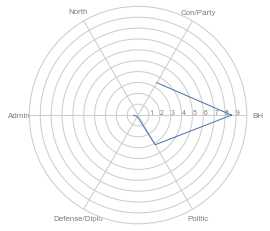

In [135]:
df_radar = df_scores.reset_index().rename(columns = {"index" : "Group"})
categories_radar = list(df_radar)[1:]
N_radar = len(categories_radar)

values_radar = df_radar.loc[0].drop("Group").values.flatten().tolist()
values_radar += values_radar[:1]

angles_radar = [n / float(N_radar)*2*pi for n in range(N_radar)]
angles_radar += angles_radar[:1]

ax_radar = plt.subplot(111, polar = True)

plt.xticks(angles_radar[:-1], categories_radar, color = "grey", size = 8)

ax_radar.set_rlabel_position(0)
plt.yticks([1, 2, 3, 4, 5, 6, 7, 8, 9], 
          ["1", "2", "3", "4", "5", "6", "7", "8", "9"],
          color = "grey", size = 7)
plt.ylim(0, 10)

ax_radar.plot(angles_radar, values_radar, linewidth = 1, linestyle = "solid")
ax_radar.fill(angles_radar, values_radar, "b", alpha=0.1)

In [136]:
##### 점수 계산 및 레이터 챠트 함수 만들기

In [137]:
def auto_6_scores_radar_chart(fname):
    
    ## ".txt 파일 읽어오기" #################################################################
    with open(fname, "rb") as data:
        data = data.read()
        data = data.decode("utf-8")

    ## 읽은 파일 내용에 대한 tfidf DataFrame 만들기 ##########################################
    df_test_doc = pd.DataFrame({"Content"  : [data]})
    test_doc_data_list = df_test_doc["Content"].astype(str).tolist()
    test_doc_data_arr = np.array(["".join(text) for text in test_doc_data_list])
    vectorizer = TfidfVectorizer(max_df = 2, tokenizer = kor_noun, norm = 'l2')
    test_doc_data = vectorizer.fit_transform(test_doc_data_arr)
    test_doc_df_tfidf = pd.DataFrame(test_doc_data.A, columns = vectorizer.get_feature_names())
    
    ## X_test_doc 데이터 포맷을 모델의 입력 데이터 포맷과 일치하는 작업 ###########################
    
    ## 읽은 데이터에 대한 부분 단어 데이터 프레임 만들기
    df_partial_words = test_doc_df_tfidf.transpose()
    df_partial_words["words"] = df_partial_words.index
    df_partial_words = df_partial_words.rename(columns = {0 : "weights"})
    
    ## 전체 단어 데이터 프레임(left)과 부분 단어 데이터 프레임(right)를 서로 "left outer join"
    df_total_words = pd.DataFrame(df_tfidf.columns.values, columns = ["words"])
    merged_total_partial_df_by_words = pd.merge(df_total_words,
                                                df_partial_words[["weights", "words"]],
                                                how = "left",
                                                on = ["words"])
    
    ## "left outer" 조인 후 인덱스를 전체 단어로 대체
    merged_total_partial_df_by_words.index = merged_total_partial_df_by_words["words"].tolist()
    
    ## "words" 컬럼 삭제
    total_partial_df_by_words = merged_total_partial_df_by_words.drop(["words"], axis = 1)
    
    ## "transpose()"하고 "NaN" 갑을 0으로 대체, 최종 모델 입력 데이터 생성
    X_test_doc = total_partial_df_by_words.transpose().fillna(0)
    
    ## 각 모델별 지수 산출 #################################################################
    
    ## 청와대(bh) 지수
    if elastic_bh.predict(X_test_doc)[0] >= 0:
        BH_score = elastic_bh.predict(X_test_doc)[0]
    else:
        BH_score = 0
        
    print("청와대 지수 : ", BH_score)
    
    ## 국회/정당(con_party) 지수
    if elastic_con_party.predict(X_test_doc)[0] >= 0:
        Con_Party_score = elastic_con_party.predict(X_test_doc)[0]
    else:
        Con_Party_score = 0

    print("국회/정당 지수 : ", Con_Party_score)
    
    ## 북한(north) 지수
    if elastic_north.predict(X_test_doc)[0] >= 0:
        North_score = elastic_north.predict(X_test_doc)[0]
    else:
        North_score = 0
        
    print("북한 지수 : ", North_score)
    
    ## 행정(admin) 지수
    if elastic_admin.predict(X_test_doc)[0] >= 0:
        Admin_score = elastic_admin.predict(X_test_doc)[0]
    else:
        Admin_score = 0
        
    print("행정 지수 : ", Admin_score)
    
    ## 국방/외교(defence_diplo) 지수
    if elastic_defence_diplo.predict(X_test_doc)[0] >= 0:
        Defence_diplo_score = elastic_defence_diplo.predict(X_test_doc)[0]
    else:
        Defence_diplo_score = 0
        
    print("국방/외교 지수 : ", Defence_diplo_score)
    
    ## 정치(politic) 지수
    if elastic_politic.predict(X_test_doc)[0] >= 0:
        Politic_score = elastic_politic.predict(X_test_doc)[0]
    else:
        Politic_score = 0
        
    print("정치일반 지수 : ", Politic_score, "\n\n")
    
    ## 각 지수 데이터 프레임 생성
    global df_scores
    global df_score_transposed
    df_scores = pd.DataFrame.from_items([("BH", [BH_score]),
                                        ("Con/Party", [Con_Party_score]),
                                        ("North", [North_score]),
                                        ("Admin", [Admin_score]),
                                        ("Defense/Diplo", [Defence_diplo_score]),
                                        ("Politic", [Politic_score])])
    df_score_index = ["Scores"]
    df_scores.index =df_score_index
    df_score_transposed = df_scores.transpose()
    
    ## radar chart 그리기 ############################################################
    df_radar = df_scores.reset_index().rename(columns = {"index" : "Group"})
    categories_radar = list(df_radar)[1:]
    N_radar = len(categories_radar)
    
    values_radar = df_radar.loc[0].drop("Group").values.flatten().tolist()
    values_radar += values_radar[:1]
    
    angles_radar = [n / float(N_radar)*2*pi for n in range(N_radar)]
    angles_radar += angles_radar[:1]
    
    ax_radar = plt.subplot(111, polar = True)
    plt.xticks(angles_radar[:-1], categories_radar, color = "grey", size = 8)
    
    ax_radar.set_rlabel_position(0)
    plt.yticks([1, 2, 3, 4, 5, 6, 7, 8, 9], ["1", "2", "3", "4", "5", "6", "7", "8", "9"],
          color = "grey", size = 7)
    plt.ylim(0, 10)
    
    ax_radar.plot(angles_radar, values_radar, linewidth = 1, linestyle = "solid")
    ax_radar.fill(angles_radar, values_radar, "b", alpha=0.1)

청와대 지수 :  8.595485090973739
국회/정당 지수 :  3.4408796129761843
북한 지수 :  0
행정 지수 :  0.4143353233798872
국방/외교 지수 :  0.1516826872381194
정치일반 지수 :  3.1516784101620874 




C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


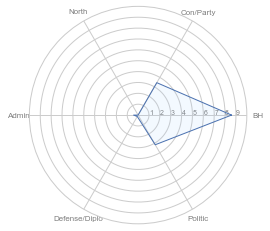

In [138]:
auto_6_scores_radar_chart("./test_news/20170101_7시간해명 집중한 대통령...돌연 기자 간담회, 왜.txt")

##### 예측점수 중 가장 많은 점수로 기사를 분류 후 실제 분류와 비교(정확도 계산)

In [139]:
def auto_6_scores_of_text_without_print(fname):
    
    ## ".txt 파일 읽어오기" #################################################################
    with open(fname, "rb") as data:
        data = data.read()
        data = data.decode("utf-8")

    ## 읽은 파일 내용에 대한 tfidf DataFrame 만들기 ##########################################
    df_test_doc = pd.DataFrame({"Content"  : [data]})
    test_doc_data_list = df_test_doc["Content"].astype(str).tolist()
    test_doc_data_arr = np.array(["".join(text) for text in test_doc_data_list])
    vectorizer = TfidfVectorizer(max_df = 2, tokenizer = kor_noun, norm = 'l2')
    test_doc_data = vectorizer.fit_transform(test_doc_data_arr)
    test_doc_df_tfidf = pd.DataFrame(test_doc_data.A, columns = vectorizer.get_feature_names())
    
    ## X_test_doc 데이터 포맷을 모델의 입력 데이터 포맷과 일치하는 작업 ###########################
    
    ## 읽은 데이터에 대한 부분 단어 데이터 프레임 만들기
    df_partial_words = test_doc_df_tfidf.transpose()
    df_partial_words["words"] = df_partial_words.index
    df_partial_words = df_partial_words.rename(columns = {0 : "weights"})
    
    ## 전체 단어 데이터 프레임(left)과 부분 단어 데이터 프레임(right)를 서로 "left outer join"
    df_total_words = pd.DataFrame(df_tfidf.columns.values, columns = ["words"])
    merged_total_partial_df_by_words = pd.merge(df_total_words,
                                                df_partial_words[["weights", "words"]],
                                                how = "left",
                                                on = ["words"])
    
    ## "left outer" 조인 후 인덱스를 전체 단어로 대체
    merged_total_partial_df_by_words.index = merged_total_partial_df_by_words["words"].tolist()
    
    ## "words" 컬럼 삭제
    total_partial_df_by_words = merged_total_partial_df_by_words.drop(["words"], axis = 1)
    
    ## "transpose()"하고 "NaN" 갑을 0으로 대체, 최종 모델 입력 데이터 생성
    X_test_doc = total_partial_df_by_words.transpose().fillna(0)
    
    ## 각 모델별 지수 산출 #################################################################
    
    ## 청와대(bh) 지수
    global BH_score
    BH_score = elastic_bh.predict(X_test_doc)[0]
    
    ## 국회/정당(con_party) 지수
    global Con_Party_score
    Con_Party_score = elastic_con_party.predict(X_test_doc)[0]
    
    ## 북한(north) 지수
    global North_score
    North_score = elastic_north.predict(X_test_doc)[0]

    ## 행정(admin) 지수
    global Admin_score
    Admin_score = elastic_admin.predict(X_test_doc)[0]
    
    ## 국방/외교(defence_diplo) 지수
    global Defence_diplo_score
    Defence_diplo_score = elastic_defence_diplo.predict(X_test_doc)[0]
    
    ## 정치(politic) 지수
    global Politic_score
    Politic_score = elastic_politic.predict(X_test_doc)[0]

In [140]:
from os import listdir
from os.path import isfile, join
myfiles = [f for f in listdir("./news") if isfile(join("./news", f))]

In [141]:
myfiles.sort()

In [142]:
len(myfiles)

365

In [143]:
BH_score_list = []
Con_Party_score_list = []
North_score_list = []
Admin_score_list = []
Defence_Diplo_score_list = []
Politic_score_list = []

for i in myfiles:
    
    # 읽어올 파일 이름 만들기
    fname = "./news/" + i
    
    ## 읽은 파일 내용에 대한 각 분야별 지수 계산(auto_6_scores_of_text_without_print 함수 이용)
    auto_6_scores_of_text_without_print(fname)
    
    BH_score_list.append(BH_score)
    Con_Party_score_list.append(Con_Party_score)
    North_score_list.append(North_score)
    Admin_score_list.append(Admin_score)
    Defence_Diplo_score_list.append(Defence_diplo_score)
    Politic_score_list.append(Politic_score)

C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [144]:
df_test = pd.DataFrame(columns=["BH", "Con/Party", "North", "Admin",
                                 "Defence/Diplo", "Politic"])
df_test["BH"] = BH_score_list
df_test["Con/Party"] = Con_Party_score_list
df_test["North"] = North_score_list
df_test["Admin"] = Admin_score_list
df_test["Defence/Diplo"] = Defence_Diplo_score_list
df_test["Politic"] = Politic_score_list

In [145]:
df_test.head()

,BH,Con/Party,North,Admin,Defence/Diplo,Politic
0,9.726184,2.902576,-0.967088,0.115460,-0.574612,3.375722
1,6.287002,-0.720626,0.266411,0.503647,-0.303105,3.079211
2,6.594995,0.822646,-0.416149,0.564240,0.315885,3.513176
3,4.563722,0.529652,0.637710,1.536373,-0.090278,4.438874
4,6.905071,0.355169,-0.368948,0.065061,-0.313791,2.170892


In [146]:
df_test["Category(predicted)"] = df_test.idxmax("columns")

In [147]:
len(datetime_list)

365

In [148]:
df_test.shape

(365, 7)

In [149]:
df_test["Date"] = datetime_list

In [150]:
df_test.head()

,BH,Con/Party,North,Admin,Defence/Diplo,Politic,Category(predicted),Date
0,9.726184,2.902576,-0.967088,0.115460,-0.574612,3.375722,BH,20170101
1,6.287002,-0.720626,0.266411,0.503647,-0.303105,3.079211,BH,20170102
2,6.594995,0.822646,-0.416149,0.564240,0.315885,3.513176,BH,20170103
3,4.563722,0.529652,0.637710,1.536373,-0.090278,4.438874,BH,20170104
4,6.905071,0.355169,-0.368948,0.065061,-0.313791,2.170892,BH,20170105


In [151]:
df_predicted = df_test[["Date", "BH", "Con/Party", "North",  "Admin", "Defence/Diplo", "Politic", "Category(predicted)"]]
df_predicted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
Date                   365 non-null object
BH                     365 non-null float64
Con/Party              365 non-null float64
North                  365 non-null float64
Admin                  365 non-null float64
Defence/Diplo          365 non-null float64
Politic                365 non-null float64
Category(predicted)    365 non-null object
dtypes: float64(6), object(2)
memory usage: 22.9+ KB


In [152]:
df_predicted["Date"] = df_predicted["Date"].tolist()
df_predicted.head()

,Date,BH,Con/Party,North,Admin,Defence/Diplo,Politic,Category(predicted)
0,20170101,9.726184,2.902576,-0.967088,0.115460,-0.574612,3.375722,BH
1,20170102,6.287002,-0.720626,0.266411,0.503647,-0.303105,3.079211,BH
2,20170103,6.594995,0.822646,-0.416149,0.564240,0.315885,3.513176,BH
3,20170104,4.563722,0.529652,0.637710,1.536373,-0.090278,4.438874,BH
4,20170105,6.905071,0.355169,-0.368948,0.065061,-0.313791,2.170892,BH


In [153]:
df_comparison = pd.concat([labeled_data, df_predicted["Category(predicted)"].to_frame()], axis=1)[["Date", "Title", "Category", "Category(predicted)"]]
df_comparison

,Date,Title,Category,Category(predicted)
0,20170101,"朴대통령 ""뇌물죄, 완전히 엮은 것…세월호 허위 걷혀야""(종합)",BH,BH
1,20170102,"정유라, 덴마크서 불법 체류 혐의로 체포···특검 “송환 협조중” (종합)",BH,BH
2,20170103,"[단독]정유라, “(주사 아줌마)누구인지 알 것 같다”…현지 답변태도 분석, 사전 ...",BH,BH
3,20170104,"[단독]""정유라, 이대학장실 등 교내서 교수 6명에 학점취득 코치받아""",Politic,BH
4,20170105,"윤전추 ""기억안나. 몰라. 말못해""… 헌재 ""본인범죄 외 답해라""",BH,BH
5,20170106,강제송환 절차 시작…정유라 '조건없는 귀국 의사' 없는 듯(종합),Politic,Politic
6,20170107,"특검, 박근혜·이재용 거래단서 포착…삼성수뇌부 소환 초읽기",BH,BH
7,20170108,"[단독] '최순실 금고' 열어보니 김영재 회사 서류…특검, 특혜의혹 수사",BH,BH
8,20170109,"조윤선 '블랙리스트 존재' 인정…""난 전혀 본적 없다""",BH,BH
9,20170110,"헌재 ""朴 대통령측 '세월호 7시간' 답변서 부족""…보완요구",BH,BH


In [154]:
## 예측된 분류 결고와 불일치하는 데이터의 갯수
len(df_comparison[df_comparison["Category"] != df_comparison["Category(predicted)"]])

60

In [155]:
## 예측된 분류 결고와 일치하는 데이터의 갯수
len(df_comparison[df_comparison["Category"] == df_comparison["Category(predicted)"]])

305

In [156]:
## 정확도 계산
305/365 

0.8356164383561644

ElasticNetCV를 활용한 각 분류별 회귀모델을 만들어 이를 이용해 문서를 분류한 결고, 약 84%의 정확도로 분류가능하였음.